# Data Augmentation - DSSIM LOSS

**Measures**:
* **Val loss TRAIN** (DSSIM)
* **Test MSE**
* **Test PSNR**
* **Test SSIM**
* **Cualitative: show reconstruction, normal and with augmentation**


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Quantitative" data-toc-modified-id="Quantitative-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Quantitative</a></span><ul class="toc-item"><li><span><a href="#Training-and-validation" data-toc-modified-id="Training-and-validation-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Training and validation</a></span></li><li><span><a href="#Test-set" data-toc-modified-id="Test-set-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Test set</a></span></li></ul></li><li><span><a href="#Qualitative-(How-it-reconstruct)---Only-in-Test" data-toc-modified-id="Qualitative-(How-it-reconstruct)---Only-in-Test-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Qualitative (How it reconstruct) - Only in Test</a></span><ul class="toc-item"><li><span><a href="#From-'clean'-images" data-toc-modified-id="From-'clean'-images-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>From 'clean' images</a></span></li><li><span><a href="#From-corrupted-inputs" data-toc-modified-id="From-corrupted-inputs-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>From corrupted inputs</a></span></li></ul></li></ul></div>

In [13]:
import glob
import os

## Quantitative

* **PSNR**
$$PSNR=10\times \log_{10}\frac{peakval^2}{MSE(x,y)}$$
* **DSSIM**
$$Structural Dissimilarity = DSSIM = \frac{1-SSIM(x,y)}{2}$$


### Training and validation

In [14]:
from create_test_report import TestMetricWrapper
model_folders = glob.glob('results/Data_Aug/dssim/*')
model_folders  = [mf for mf in model_folders if 'qualitative' not in mf]
TEST_img_PATH = '..'+os.path.sep+'IXI-T1'+os.path.sep+'PNG'+os.path.sep+'test_folder'+os.path.sep+'test'
test_img_files = glob.glob(TEST_img_PATH+os.path.sep+'*.png')

In [15]:
noaug_mse_test_metrics = TestMetricWrapper(model_folders,test_img_files)

In [16]:
_,_ = noaug_mse_test_metrics.get_training_df()
noaug_mse_test_metrics.get_min_validation_loss_df()

,Val_loss,Epoch
small_res_cae_DSSIM_full_pre_AUG_NoKReg_LRPlat,0.0041848370,37.0
myronenko_cae_DSSIM_AUG_NoKReg_LRPlat,0.0043889559,21.0
small_res_cae_DSSIM_full_pre_AUG_L2KReg_LRPlat,0.0044162706,41.0
skip_con_cae_DSSIM_AUG_NoKReg_LRPlat,0.0049040578,19.0


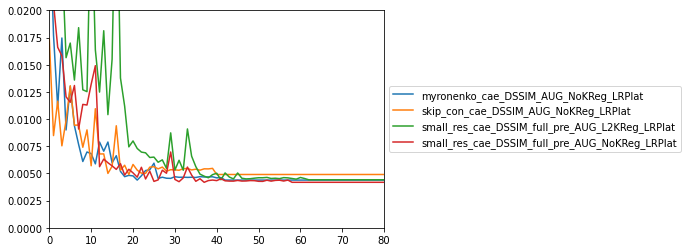

In [17]:
noaug_mse_test_metrics.plot_val_loss(ylimit = 0.02, epochs=80)

### Test set

***Method for getting metrics with keras_evaluate***: *WARN: Metric for models with L2reg add some variation due to L2 in loss*.
```python
na_mse_kers_df = noaug_mse_test_metrics.get_keras_evaluation(return_type='df', verbose=2)
na_mse_kers_df
```

In [18]:
na_mse_kers_df = noaug_mse_test_metrics.get_keras_evaluation(return_type='df', verbose=2)
na_mse_kers_df

myronenko_cae_DSSIM_AUG_NoKReg_LRPlat - 603/603 - 12s - loss: 0.0043 - mean_squared_error: 6.6854e-04 - PSNR: 32.0489
skip_con_cae_DSSIM_AUG_NoKReg_LRPlat - 603/603 - 5s - loss: 0.0047 - mean_squared_error: 4.5662e-04 - PSNR: 33.7188
small_res_cae_DSSIM_full_pre_AUG_L2KReg_LRPlat - 603/603 - 6s - loss: 0.0044 - mean_squared_error: 2.3368e-04 - PSNR: 36.7838
small_res_cae_DSSIM_full_pre_AUG_NoKReg_LRPlat - 603/603 - 8s - loss: 0.0041 - mean_squared_error: 2.8770e-04 - PSNR: 35.9141


,loss,mean_squared_error,PSNR
myronenko_cae_DSSIM_AUG_NoKReg_LRPlat,0.0043136617,0.0006685412,32.0488662720
skip_con_cae_DSSIM_AUG_NoKReg_LRPlat,0.0047127088,0.0004566170,33.7187995911
small_res_cae_DSSIM_full_pre_AUG_L2KReg_LRPlat,0.0043764170,0.0002336777,36.7838439941
small_res_cae_DSSIM_full_pre_AUG_NoKReg_LRPlat,0.0041436153,0.0002877015,35.9141235352


In [19]:
na_mse_custom_df = noaug_mse_test_metrics.get_custom_evaluation(return_type='df', verbose=True)
na_mse_custom_df.sort_values('mse_mean')

myronenko_cae_DSSIM_AUG_NoKReg_LRPlat - MSE: 6.69e-04+-2.49e-04 - DSSIM: 4.31e-03+-1.28e-03 - PSNR: 3.20e+01+-1.64e+00

skip_con_cae_DSSIM_AUG_NoKReg_LRPlat - MSE: 4.57e-04+-1.73e-04 - DSSIM: 4.71e-03+-2.40e-03 - PSNR: 3.37e+01+-1.69e+00

small_res_cae_DSSIM_full_pre_AUG_L2KReg_LRPlat - MSE: 2.34e-04+-1.09e-04 - DSSIM: 3.70e-03+-1.29e-03 - PSNR: 3.68e+01+-2.08e+00

small_res_cae_DSSIM_full_pre_AUG_NoKReg_LRPlat - MSE: 2.88e-04+-1.42e-04 - DSSIM: 4.14e-03+-1.28e-03 - PSNR: 3.59e+01+-2.13e+00



,mse_mean,mse_std,dssim_mean,dssim_std,psnr_mean,psnr_std
small_res_cae_DSSIM_full_pre_AUG_L2KReg_LRPlat,0.0002336778,0.0001088247,0.0037011295,0.0012935253,36.7838516235,2.0765995979
small_res_cae_DSSIM_full_pre_AUG_NoKReg_LRPlat,0.0002877014,0.0001420812,0.0041437419,0.0012819683,35.9141235352,2.1301319599
skip_con_cae_DSSIM_AUG_NoKReg_LRPlat,0.0004566167,0.0001729846,0.0047127949,0.0024010523,33.7187995911,1.6924651861
myronenko_cae_DSSIM_AUG_NoKReg_LRPlat,0.0006685411,0.0002488931,0.0043136482,0.0012764379,32.0488739014,1.6372776031


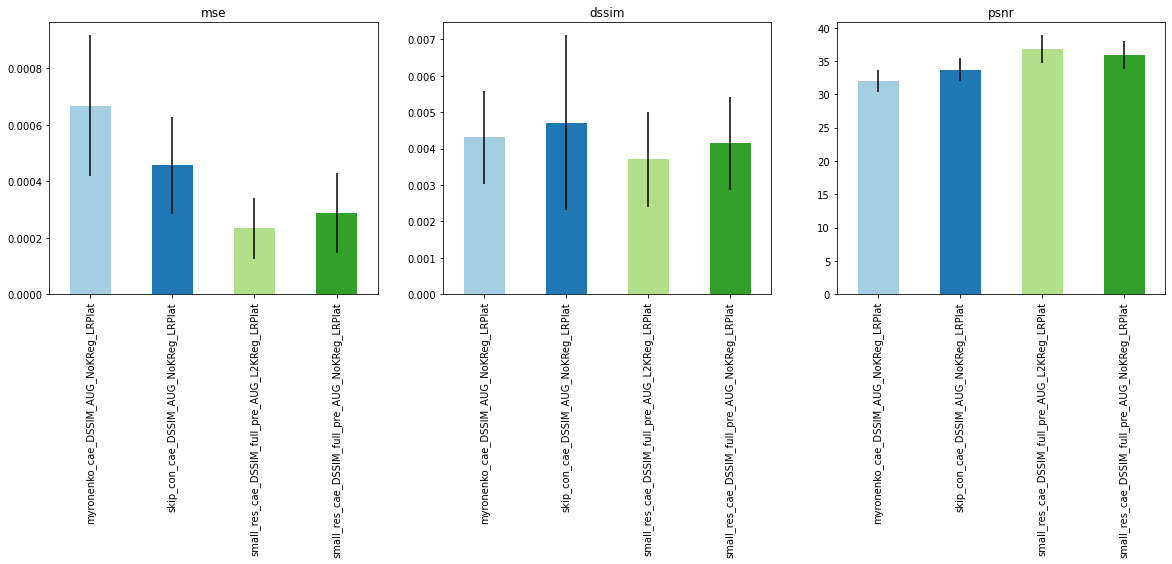

In [20]:
no_aug_mse_plot = noaug_mse_test_metrics.plot_custom_metrics()

## Qualitative (How it reconstruct) - Only in Test
### From 'clean' images
How the models reconstruct unmodified input MRIs?

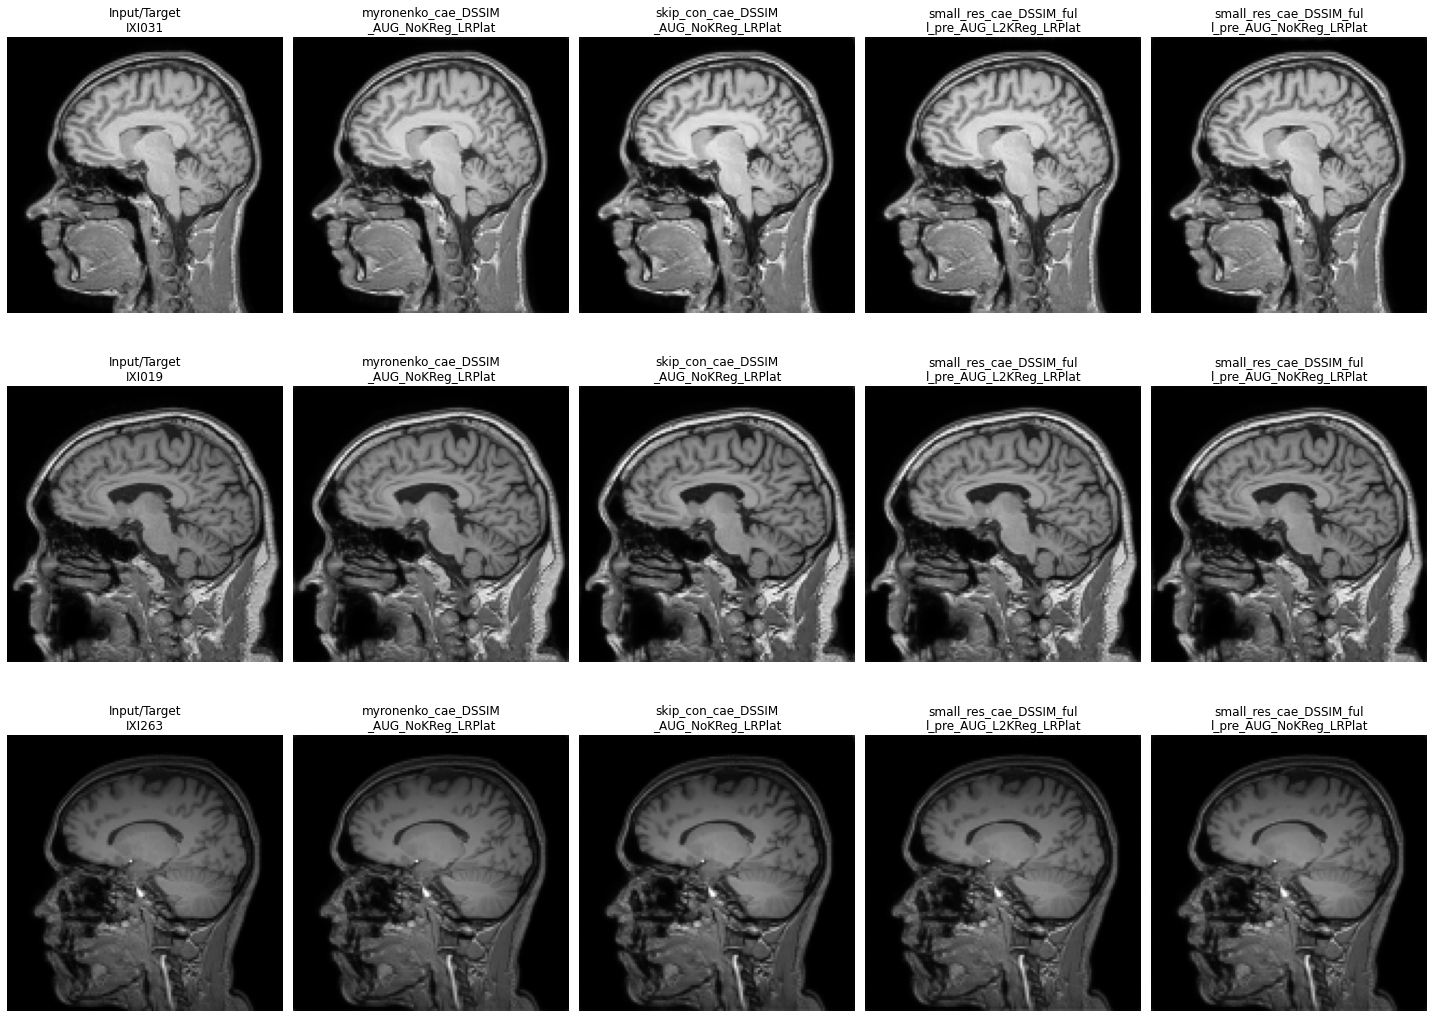

In [21]:
clear_mris = noaug_mse_test_metrics.plot_images(id_images = [183,75], n_random=1, figsize=(20,15)) #id=800 is a good slice too

### From corrupted inputs

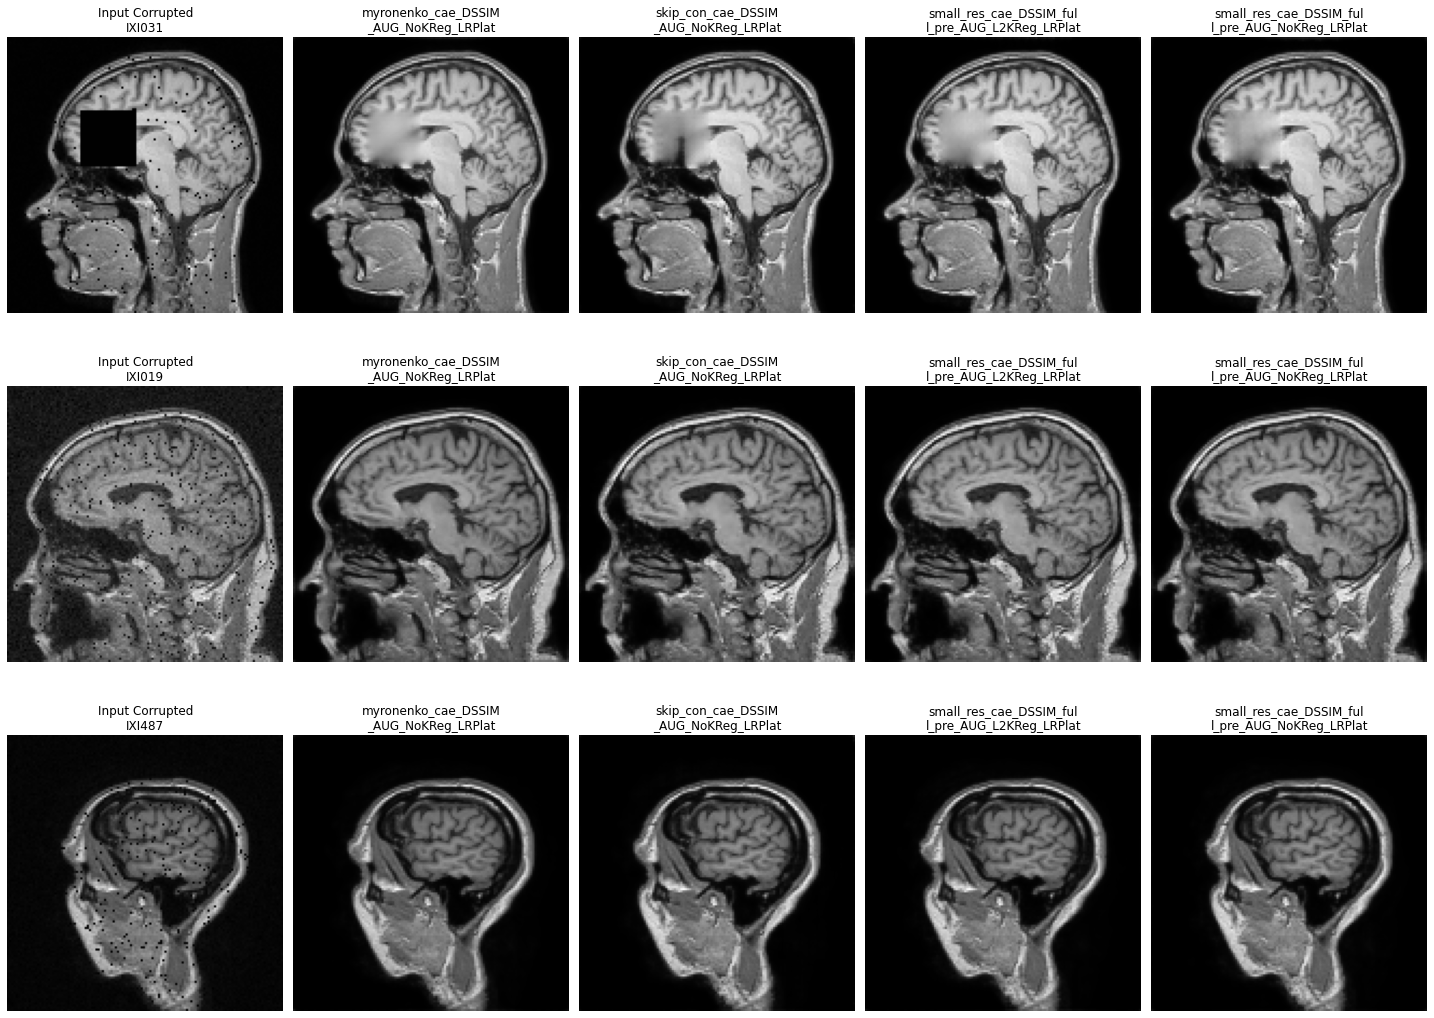

In [28]:
corrupted_mris, sel_images = noaug_mse_test_metrics.plot_corrupted_images(id_images = [183,75], n_random=1, figsize=(20,15)) # 6 